
### EXP1-Social SPM maps

#### *Preprocessing:*
- Niak preprocessed SOCIAL task (new scrub method)

#### *run  SPM-Maps separetly for each trial:*

```
   Mental interaction
   Random interaction
   Mental Vs random
  
```

In [36]:
from nilearn import plotting
import os,glob
import numpy as np
import matplotlib.cm as cmx
import nibabel as nib
import scipy.io as sio
import nibabel as nib

In [2]:
%matplotlib inline

In [37]:
# Set path
#path_root = "/home/yassinebha/Drive/HCP/"
#path_root = "/media/yassinebha/database29/Drive/HCP/"
path_root = "/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/"
path_act = os.path.join(path_root,"hcp_social_mental_activation_maps_04-May-2017/")
path_rmaps = os.path.join(path_root,"hcp_social_mental_activation_maps_04-May-2017/group_maps/")
rmaps_file_pattern = "{}.nii.gz"

In [47]:
# get networks names
trial_names = [f[:-7] for f in os.listdir(path_rmaps)]
trial_names 

['rnd', 'mental_minus_rnd', 'mental']

# Social Vs Baseline

(53, 64, 52) is the shape of for trial:  rnd
Min = -26.146; Max = 46.177
(53, 64, 52) is the shape of for trial:  mental_minus_rnd
Min = -25.448; Max = 40.530
(53, 64, 52) is the shape of for trial:  mental
Min = -28.229; Max = 52.251
SPM map from HCP Paper


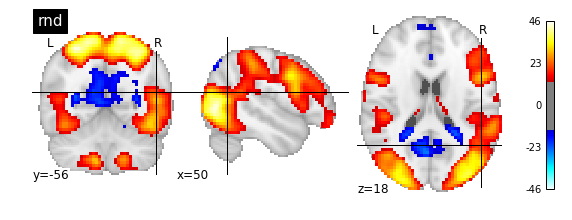

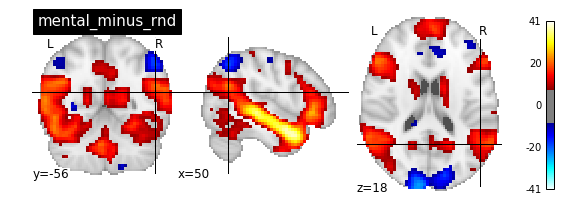

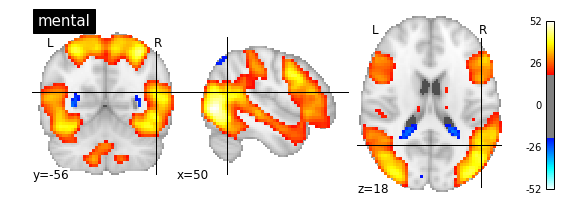

In [5]:
for index, trial in enumerate(trial_names):
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial))
    in_vol=nib.load(trial_file)
    
    print("(%s, %s, %s) is the shape of for trial: " %  in_vol.shape, trial)
    print("Min = %.3f; Max = %.3f" % (in_vol.get_data().min(), in_vol.get_data().max()))
    
    
    # Plot volume
    display = plotting.plot_stat_map(in_vol, threshold= np.percentile(in_vol.get_data(),90),
                                     cut_coords=(50,-56, 18),
                                     title= "%s" % trial
                                    )
from IPython.display import Image
print ("SPM map from HCP Paper")
Image(url= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4011498/bin/nihms569034f9.jpg")

SPM map for rnd trial
SPM map for mental_minus_rnd trial
SPM map for mental trial


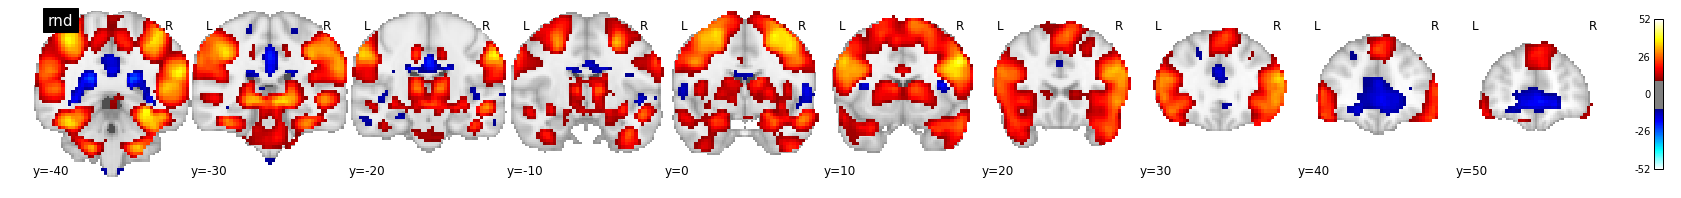

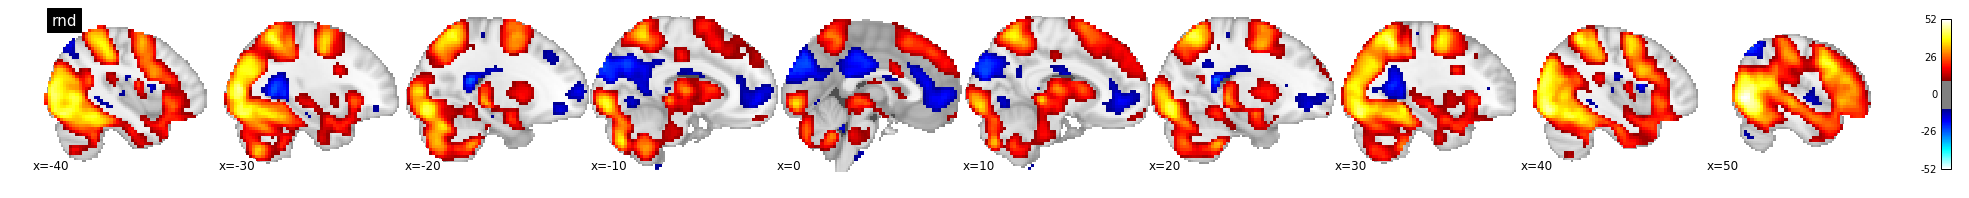

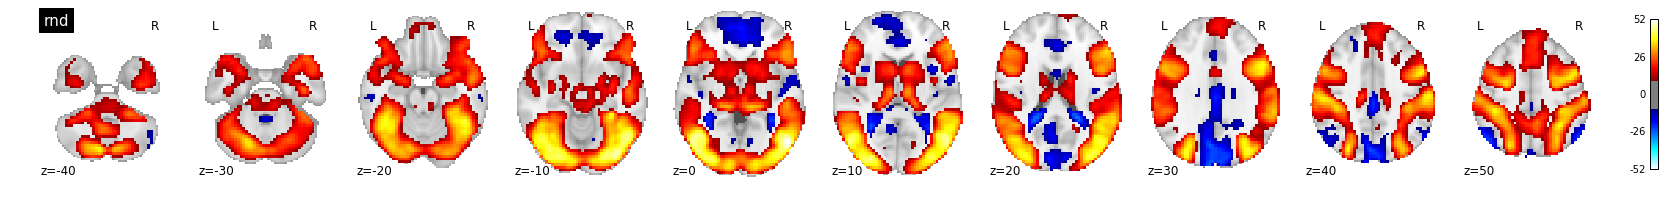

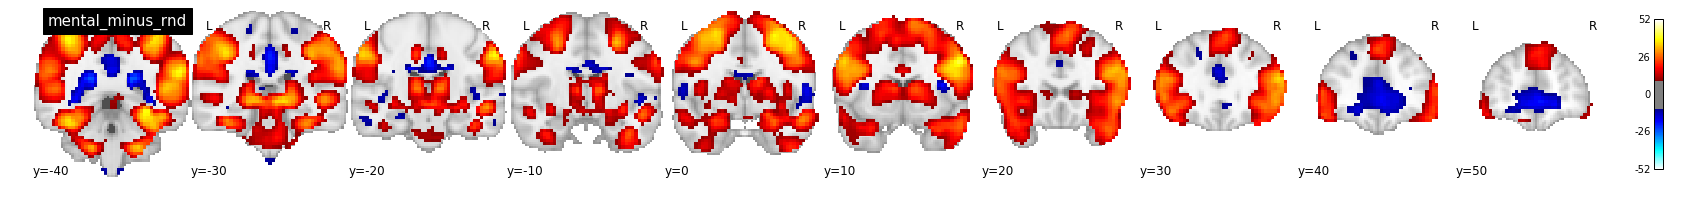

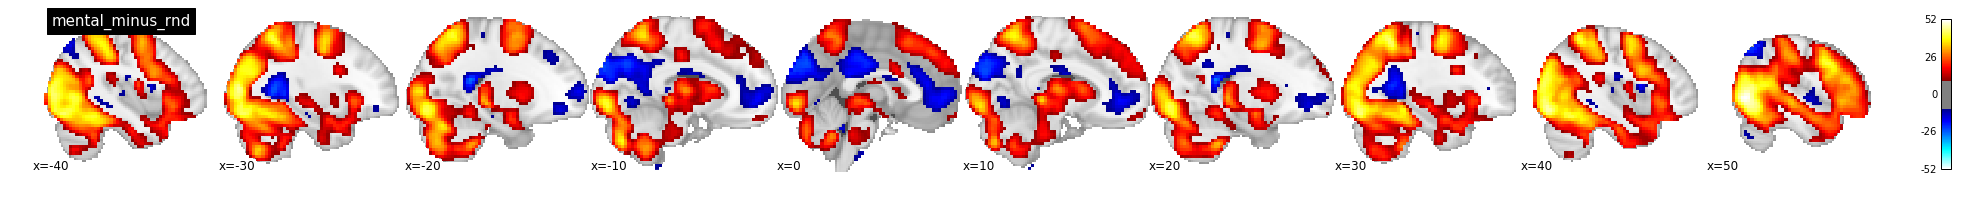

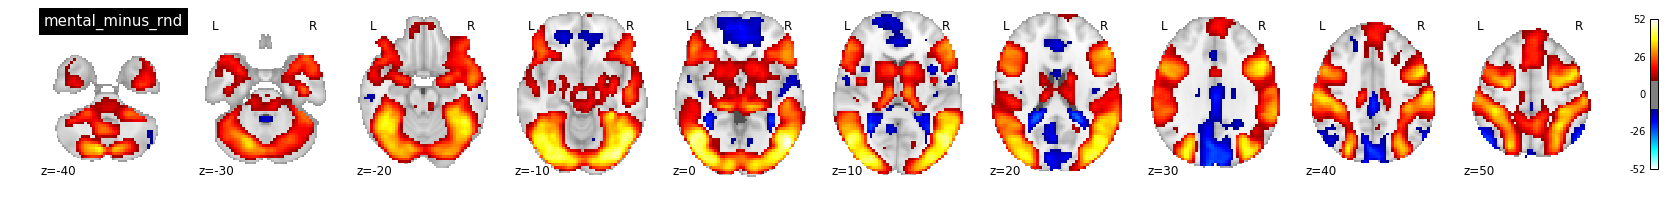

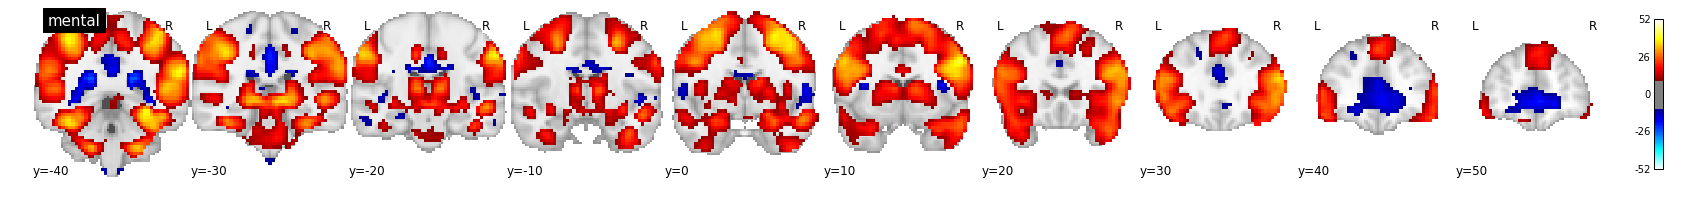

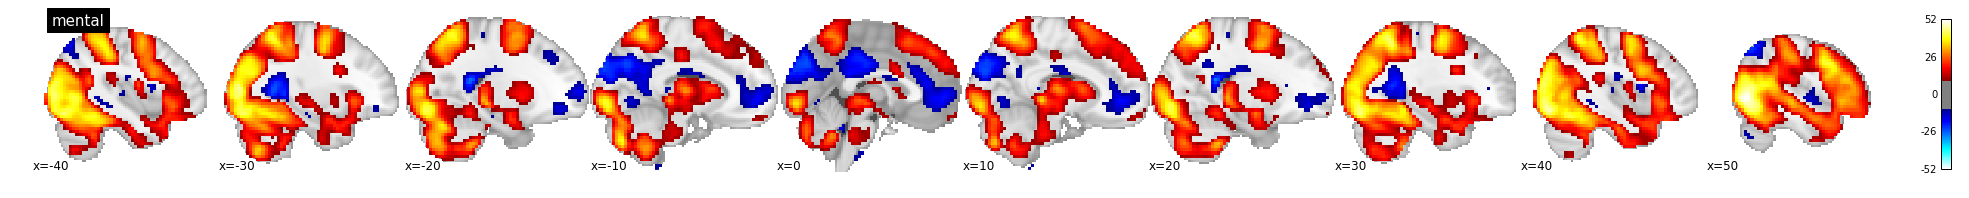

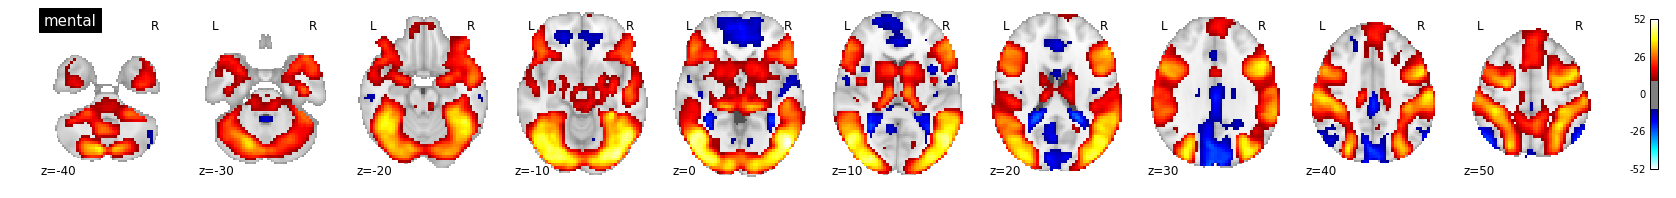

In [6]:
for index, trial in enumerate(trial_names):    
    print ("SPM map for {} trial".format(trial))
    display = plotting.plot_stat_map(in_vol, threshold= 10,
                                     display_mode='y',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='x',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )
    display = plotting.plot_stat_map(in_vol, threshold=10,
                                     display_mode='z',
                                     cut_coords= range(-40, 60, 10),
                                     title= trial
                                    )


## Surface plot : group map

In [35]:
mask_file  =  os.path.join(path_root,'templates/mask.nii.gz')
mask_data = nib.load(mask_file).get_data()
mask = mask_data != 0
header_mask = nib.load(mask_file).header
affine_mask = nib.load(mask_file).affine
print('Mask NVoxels = {}'.format(np.sum(mask)))

Mask NVoxels = 76611


In [50]:
for idx,trial_name in enumerate(trial_names):
    ## Copy spec template
    command = ' '.join(['scp', os.path.join(path_root,'templates/template_spec.spec'),
                        os.path.join(path_act,'{}_spec.spec'.format(trial_name))])
    os.system(command)
    # Load activation volume
    trial_file = os.path.join(path_rmaps, rmaps_file_pattern.format(trial_name))
    
    # volume to surface mapping
    list_templates =['lh','rh','cerebellum']
    for template in list_templates:
        template_file = os.path.join(path_root,'templates/{}.surf.gii'.format(template))
        file_out =  os.path.join(path_act,'{}_{}.surf.gii'.format(trial_name,template))
        command = ' '.join(['wb_command -volume-to-surface-mapping',
                            trial_file , template_file , file_out ,'-enclosing'])
        os.system(command)
        # Fill spec file
        with open(os.path.join(path_act,'{}_spec.spec'.format(trial_name)),"a") as f:
            if template == 'cerebellum':
                print('   <DataFile Structure="Cerebellum"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'rh':
                print('   <DataFile Structure="CortexRight"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'lh':
                print('   <DataFile Structure="CortexLeft"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            f.close
            
    with open(os.path.join(path_act,'{}_spec.spec'.format(trial_name)),"a") as f:
        print('</CaretSpecFile>',file=f)
        f.close

## Surface plot: One subject map

In [59]:
trial_names  = ['mental','rnd','contrast_mental_vs_rnd']

In [66]:
for idx,trial_name in enumerate(trial_names):
    ## Copy spec template
    command = ' '.join(['scp', os.path.join(path_root,'templates/template_spec.spec'),
                        os.path.join(path_act,'{}_spec_one_subj.spec'.format(trial_name))])
    os.system(command)
    # Load activation volume
    trial_file = os.path.join(path_act,'HCP100206/all_runs/spm_{}.nii.gz'.format(trial_name))
    
    # volume to surface mapping
    list_templates =['lh','rh','cerebellum']
    for template in list_templates:
        template_file = os.path.join(path_root,'templates/{}.surf.gii'.format(template))
        file_out =  os.path.join(path_act,'{}_{}_one_subj.surf.gii'.format(trial_name,template))
        command = ' '.join(['wb_command -volume-to-surface-mapping',
                            trial_file , template_file , file_out ,'-enclosing'])
        os.system(command)
        # Fill spec file
        with open(os.path.join(path_act,'{}_spec_one_subj.spec'.format(trial_name)),"a") as f:
            if template == 'cerebellum':
                print('   <DataFile Structure="Cerebellum"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'rh':
                print('   <DataFile Structure="CortexRight"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            elif template == 'lh':
                print('   <DataFile Structure="CortexLeft"\n\
         DataFileType="METRIC"\n\
         Selected="true">\n\
 {}\n\
</DataFile>'.format(file_out), file=f)
            f.close
            
    with open(os.path.join(path_act,'{}_spec_one_subj.spec'.format(trial_name)),"a") as f:
        print('</CaretSpecFile>',file=f)
        f.close

In [68]:
trial_file

'/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/hcp_social_mental_activation_maps_04-May-2017/HCP100206/all_runs/spm_contrast_mental_vs_rnd.nii.gz'

In [67]:
path_rmaps

'/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/hcp_social_mental_activation_maps_04-May-2017/group_maps/'

In [65]:
path_act

'/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/hcp_social_mental_activation_maps_04-May-2017/'

In [8]:
# Get a cortical mesh
from nilearn import datasets

fsaverage = datasets.fetch_surf_fsaverage5()

In [15]:
# Sample the 3D data around each node of the mesh
from nilearn import surface

texture = surface.vol_to_surf(in_vol, fsaverage.pial_right)

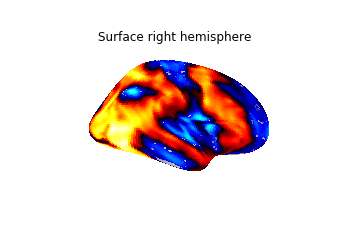

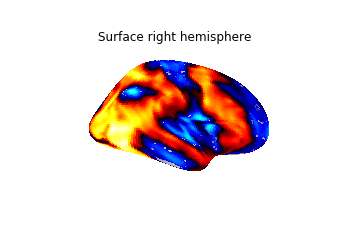

In [52]:
#Plot the result
from nilearn import plotting

plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere',
                            threshold=0.3, bg_map=fsaverage.sulc_right,
                            cmap='cold_hot')